In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import seaborn as sns

import sys
sys.path.append('../')
from src.config import CONDITIONS_PER_DATASET, CONDITIONS, RESULTS_DIR
from src.condition import Condition
from helpers import cm2inch, title

In [7]:
results = pd.read_csv(os.path.join(RESULTS_DIR, 'dist-dip-test-results.csv'), index_col=0)

### Plot functions

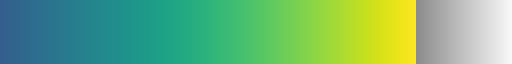

In [8]:
def get_pval_cmap(vmin, vmax, alpha=0.05, gray=True):
    split = (np.log10(alpha) - np.log10(vmin)) / (np.log10(vmax) - np.log10(vmin))
    if gray:
        colors1 = plt.cm.gray_r(np.linspace(.03, .45, int(1000*(1-split))))
    else: 
        colors1 = plt.cm.magma(np.linspace(.6, .9, int(1000*(1-split))))
    colors2 = plt.cm.viridis_r(np.linspace(0, .7, int(1000*split)))
    colors = np.vstack((colors1, colors2))[::-1]
    return mcolors.LinearSegmentedColormap.from_list('pval_colormap', colors)

pval_cmap = get_pval_cmap(1e-7, 1, alpha=0.05)
pval_cmap

In [9]:
def format_p(p, alpha=0.05, tol=1e-10):
    if np.isnan(p):
        return '-'
    if np.isclose(p, 1, tol):
        return '1'
    if np.isclose(p, 0, tol):
        return '0'
    elif p >= 0.1:
        return f'{p:.2f}'
    elif p > 0.001:
        return f'{p:.3f}'
    else:
        p_str = f'{p:.1e}'
        return p_str.replace('e-0', 'e-')

# df.applymap(format_p, alpha=0.05)

In [10]:
def show_p_values(df, alpha=0.05, vmin=1e-6, vmax=1, gray=True, **kwargs):
    sns.heatmap(
        df,
        annot=df.applymap(format_p, alpha=0.05).values,
        fmt="",
        norm=LogNorm(vmin=vmin, vmax=vmax),
        cmap = get_pval_cmap(vmin, vmax, alpha, gray=gray),
        **kwargs
    )

In [11]:
def show_dip_values(df):
    return sns.heatmap(df, annot=True, vmin=0, vmax=0.25, cmap='Blues')

## Representation

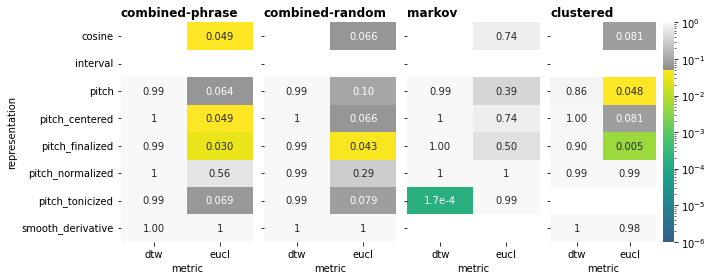

In [19]:
def query_pivot(results, query, values='tableone_p', index='representation', columns='metric'):
    return results.query(query).pivot_table(values=values, index=index, columns=columns)

def show_summary_four_datasets(
        query, dataset1='combined-phrase', dataset2='combined-random', dataset3='markov', dataset4='clustered', results=results
    ):
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(10, 4), tight_layout=True)
    df = query_pivot(results, f'{query} and dataset=="{dataset1}"')
    show_p_values(df, ax=ax0, cbar=False)
    title(dataset1, ax=ax0)

    df = query_pivot(results, f'{query} and dataset=="{dataset2}"')
    show_p_values(df, ax=ax1, cbar=False)
    title(dataset2, ax=ax1)
    ax1.set_ylabel('')

    df = query_pivot(results, f'{query} and dataset=="{dataset3}"')
    show_p_values(df, ax=ax2, cbar=False)
    title(dataset3, ax=ax2)
    ax2.set_ylabel('')

    df = query_pivot(results, f'{query} and dataset=="{dataset4}"')
    show_p_values(df, ax=ax3, cbar=True)
    title(dataset4, ax=ax3)
    ax3.set_ylabel('')

show_summary_four_datasets('unique=="all" and length=="all" and dimensionality==50')

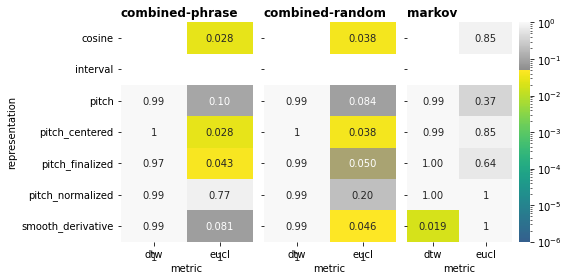

In [15]:
# Only unique contours
show_summary_three_datasets('unique=="unique" and length=="all" and dimensionality==50')

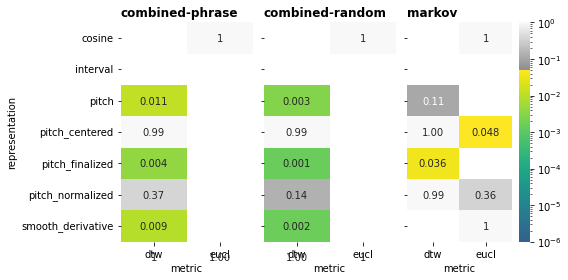

In [16]:
# Effect of dimensionality?
show_summary_three_datasets('unique=="all" and length=="all" and dimensionality==10')

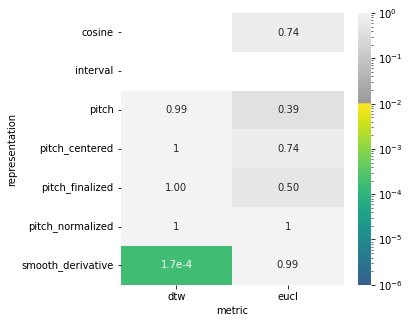

In [72]:
df = results.query(
    'dataset=="markov" and unique=="all" and length=="all" and dimensionality==50'
).pivot_table(
    values='tableone_p', 
    index='representation', 
    columns=['metric']
)
plt.figure(figsize=(5, 5))
show_p_values(df, alpha=0.01)

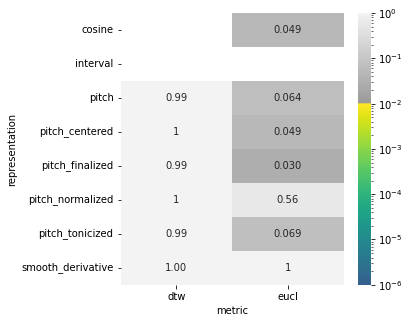

In [73]:
df = results.query(
    'dataset=="combined-phrase" and unique=="all" and length=="all" and dimensionality==50'
).pivot_table(
    values='tableone_p', 
    index='representation', 
    columns=['metric']
)
plt.figure(figsize=(5, 5))
show_p_values(df, alpha=0.01)

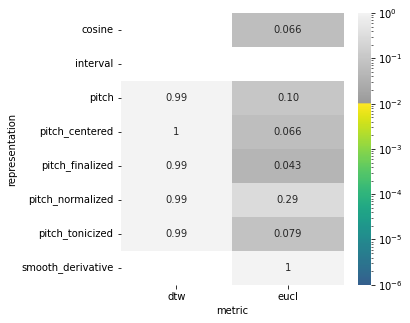

In [74]:
df = results.query(
    'dataset=="combined-random" and unique=="all" and length=="all" and dimensionality==50'
).pivot_table(
    values='tableone_p', 
    index='representation', 
    columns=['metric']
)
plt.figure(figsize=(5, 5))
show_p_values(df, alpha=0.01)

## Effect of length

In [75]:
representation
metric
length
unique
limit
dimensionality

NameError: name 'representation' is not defined

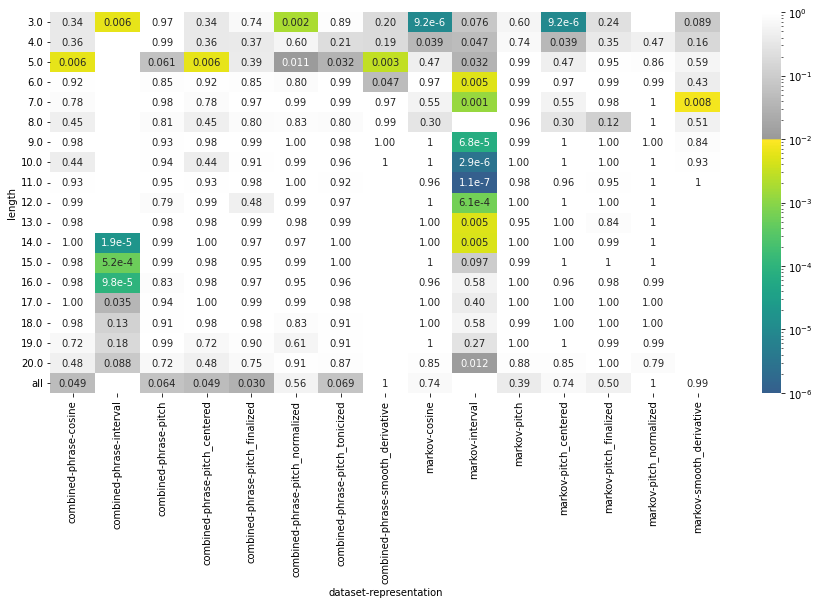

In [ ]:
df = results.query(
        '(dataset=="markov" or dataset=="combined-phrase") and unique=="all" and dimensionality==50 and metric=="eucl"'
    ).pivot_table(
        values='tableone_p', 
        index='length', 
        columns=['dataset', 'representation']
    )
plt.figure(figsize=(15, 7))
show_p_values(df, alpha=0.01)

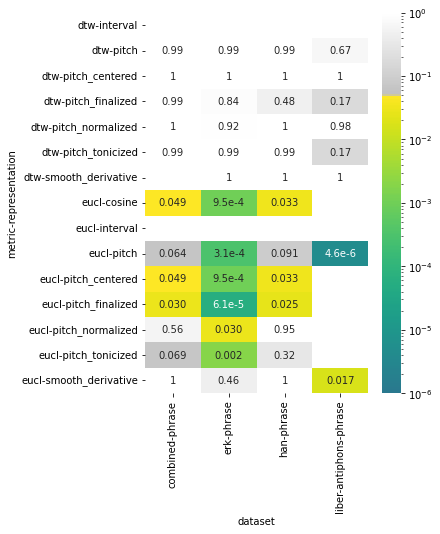

In [ ]:
df = results[results.dataset.isin(
        ['combined-phrase', 'erk-phrase', 'han-phrase', 'liber-antiphons-phrase']
    )].query(
        'length=="all" and unique=="all" and dimensionality==50'
    ).pivot_table(
        values='tableone_p', 
        columns='dataset', 
        index=['metric', 'representation']
    )

plt.figure(figsize=(5, 7))
show_scores(df, vmin=1e-6)

<AxesSubplot:xlabel='dataset', ylabel='metric-representation'>

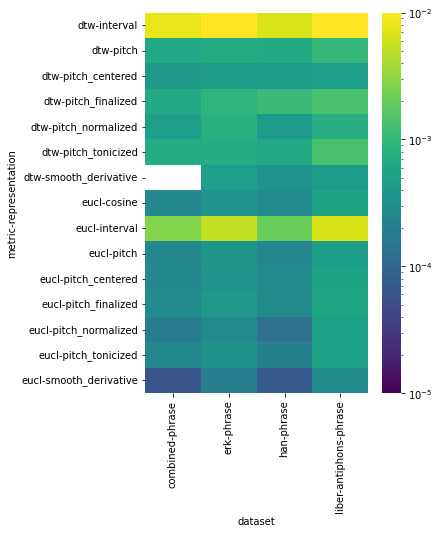

In [ ]:
df = results[results.dataset.isin(
        ['combined-phrase', 'erk-phrase', 'han-phrase', 'liber-antiphons-phrase']
    )].query(
        'length=="all" and unique=="all" and dimensionality==50'
    ).pivot_table(
        values='tableone_dip', 
        columns='dataset', 
        index=['metric', 'representation']
    )

plt.figure(figsize=(5, 7))
sns.heatmap(df, 
    norm=LogNorm(vmin=1e-5, vmax=0.01),
    cmap='viridis'
)
# show_scores(df, vmin=1e-6)

<AxesSubplot:xlabel='dataset', ylabel='metric-representation'>

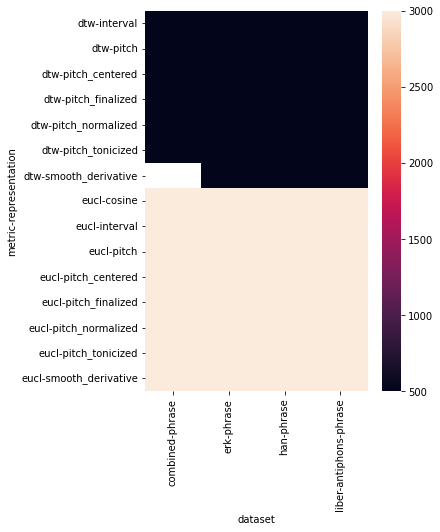

In [ ]:
df = results[results.dataset.isin(
        ['combined-phrase', 'erk-phrase', 'han-phrase', 'liber-antiphons-phrase']
    )].query(
        'length=="all" and unique=="all" and dimensionality==50'
    ).pivot_table(
        values='num_contours', 
        columns='dataset', 
        index=['metric', 'representation']
    )

plt.figure(figsize=(5, 7))
sns.heatmap(df)
# show_scores(df, vmin=1e-6)

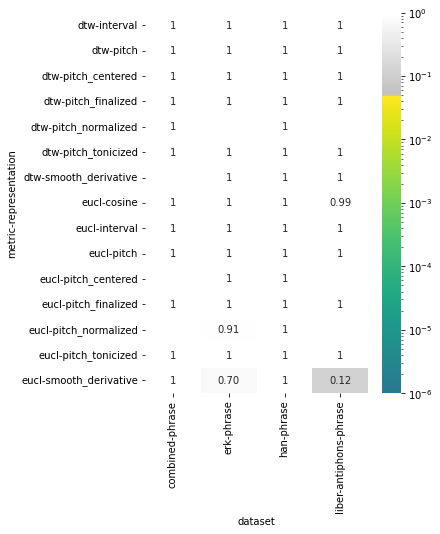

In [ ]:
df = results[results.dataset.isin(
        ['combined-phrase', 'erk-phrase', 'han-phrase', 'liber-antiphons-phrase']
    )].query(
        'length=="all" and unique=="all" and dimensionality==50'
    ).pivot_table(
        values='unidip_p', 
        columns='dataset', 
        index=['metric', 'representation']
    )

plt.figure(figsize=(5, 7))
# sns.heatmap(df, 
#     norm=LogNorm(vmin=1e-5, vmax=0.01),
# )
show_scores(df, vmin=1e-6)